# Get the data

In [1]:
#fetch_data
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
 if not os.path.isdir(housing_path):
     os.makedirs(housing_path)
 tgz_path = os.path.join(housing_path, "housing.tgz")
 urllib.request.urlretrieve(housing_url, tgz_path)
 housing_tgz = tarfile.open(tgz_path)
 housing_tgz.extractall(path=housing_path)
 housing_tgz.close()

In [2]:
fetch_housing_data()

In [7]:
#Read data

import pandas as pd
csv_path = os.path.join(HOUSING_PATH, "housing.csv")
housing=pd.read_csv(csv_path)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Exploring data

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


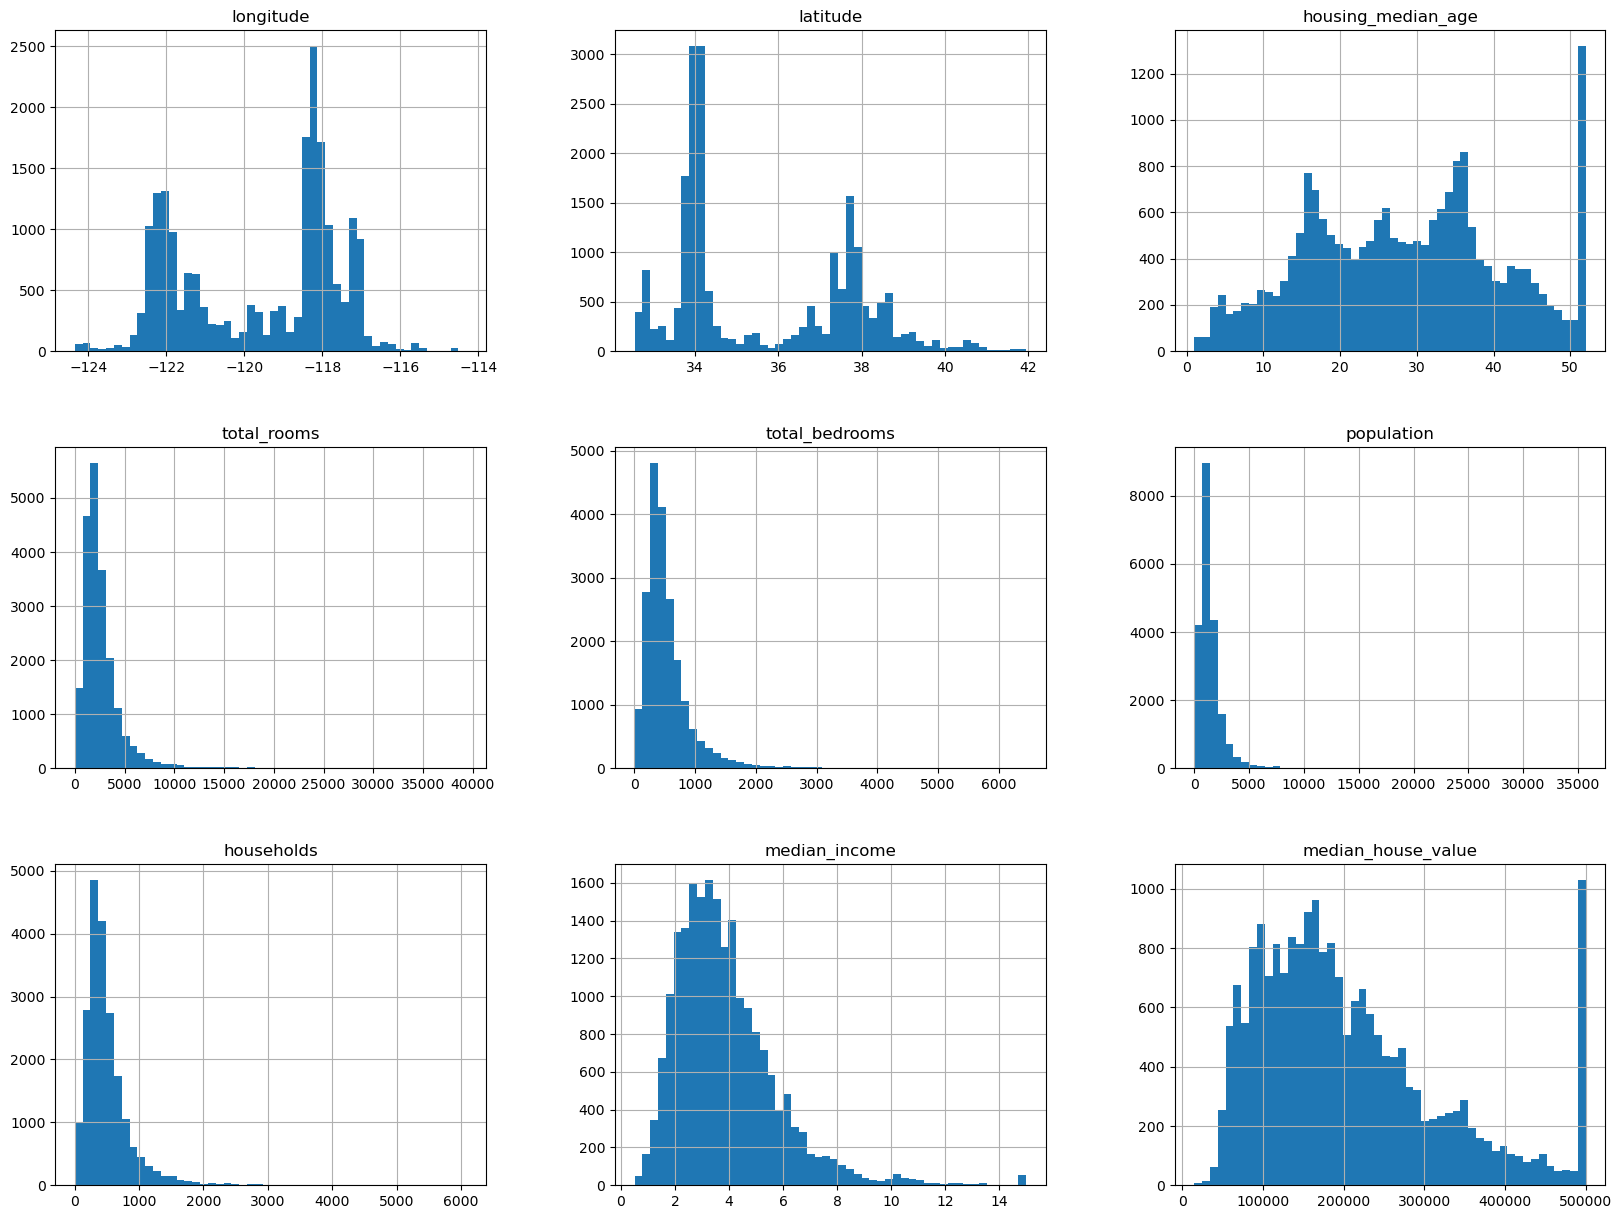

In [11]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Creating Test Set 

We will use stratified sampling based on median_income to preserve proportions.

<Axes: >

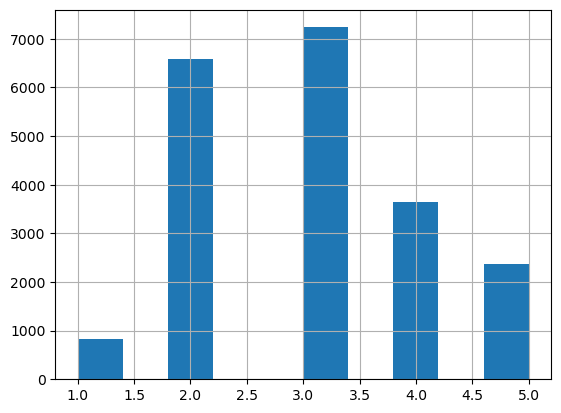

In [15]:
# first, we will create "income_cat"

import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [16]:
# stratified sampling based on the income category

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [17]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [18]:
housing["income_cat"].value_counts() / len(housing)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

We see that we have preserved 'income_cat' proportions.

In [19]:
#Drop the 'income_cat' attribute from both train and test sets

for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

# Visualizing data

In [20]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

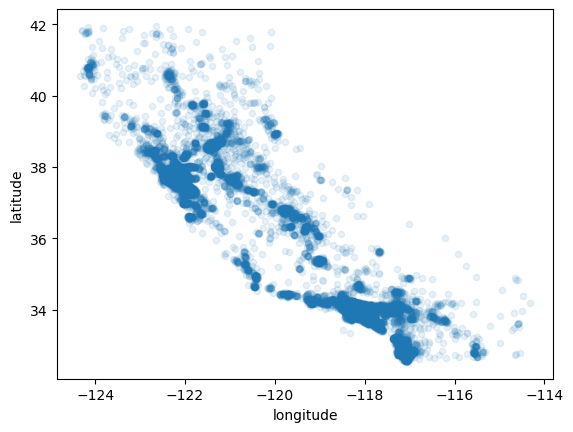

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude",alpha=0.1)

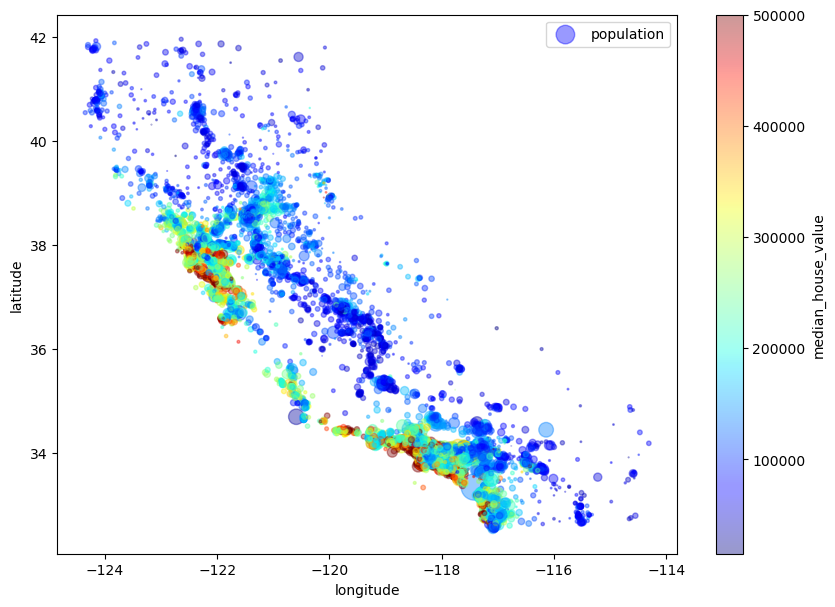

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [45]:
#Correlation matrix

numeric_data = housing.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000


In [26]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

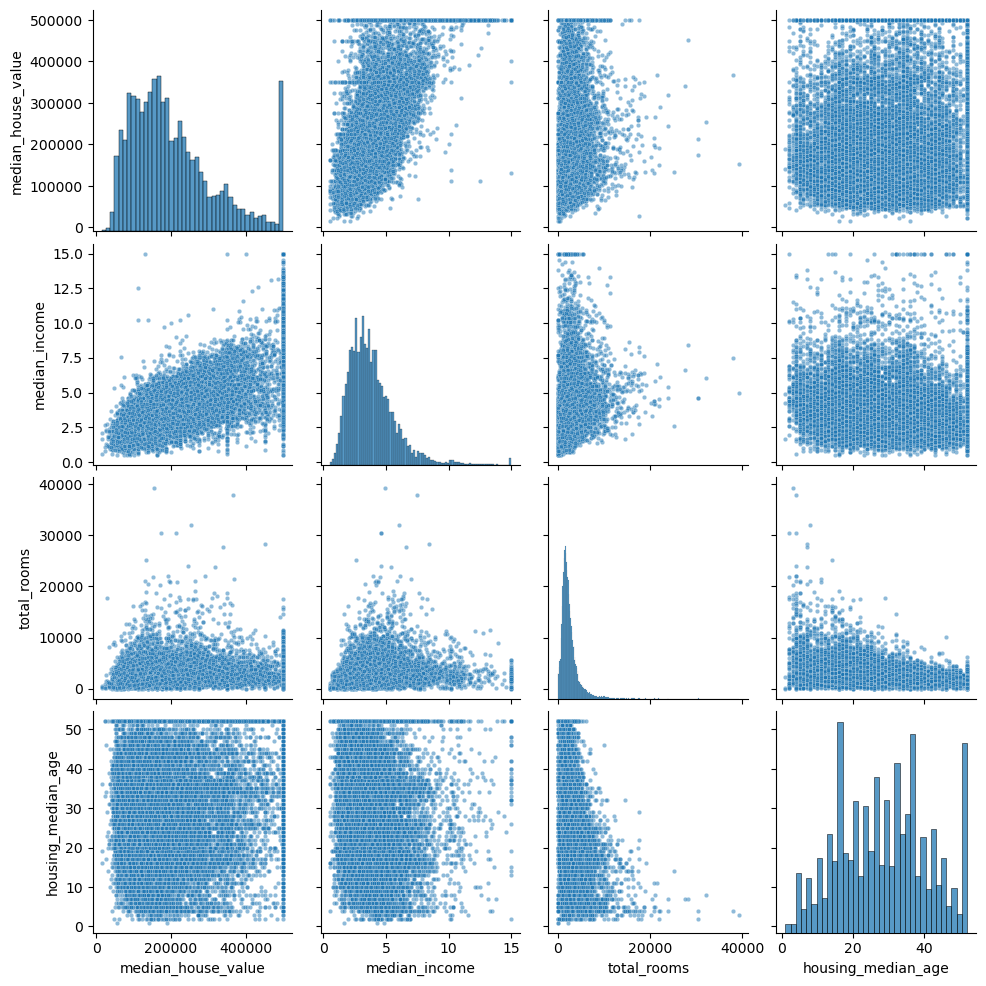

In [29]:
import seaborn as sns
sns.pairplot(
    housing[["median_house_value", "median_income", "total_rooms", "housing_median_age"]],
    plot_kws={'s': 10, 'alpha': 0.5})
plt.show()

(np.float64(0.0), np.float64(16.0), np.float64(0.0), np.float64(550000.0))

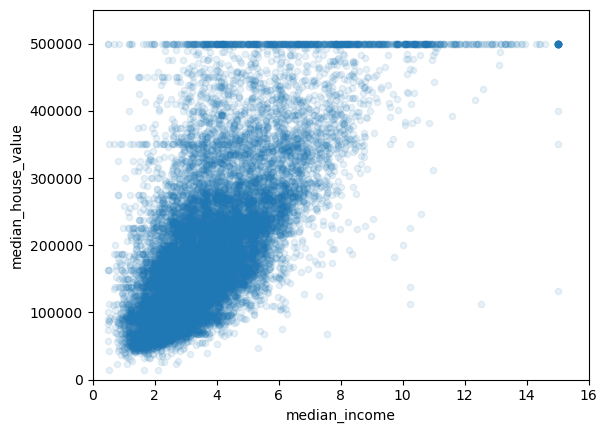

In [30]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

# Preparing data

In [43]:
#separate predictors from label

housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

First, we will create a custom transformer that adds new attributes in order to find better predictors.

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

Then, we will create a numerical pipeline to handle our numerical data by cleaning and Scaling it.

In [35]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_pipeline = Pipeline([
                        ('imputer', SimpleImputer(strategy="median")), #filling missing_values by the median 
                        ('attribs_adder', CombinedAttributesAdder()),  #adding new attributes
                        ('std_scaler', StandardScaler()),   #Scaling data using Standardization
                        ])

Next, we need to handle text and categorical attributes ('ocean_proximity') using the OneHotEncoder method. 

We will incorporate this into a comprehensive pipeline to encompass all transformations and apply them in the correct order.

In [46]:
from sklearn.compose import ColumnTransformer
housing_num = housing.select_dtypes(include=['number'])
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
                                 ("num", num_pipeline, num_attribs),
                                 ("cat", OneHotEncoder(), cat_attribs),
                                 ])

In [47]:
#Apply all transformations

housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model

## _Linear Regression_  

In [53]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
from sklearn.metrics import mean_squared_error 
lin_housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, lin_housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [49]:
lin_rmse

np.float64(68627.87390018743)

## _Decision tree regressor_  

In [55]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
tree_housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_housing_predictions)
tree_rmse = np.sqrt(tree_mse)

In [56]:
tree_rmse

np.float64(0.0)

# Cross-Validation Evaluation

In [57]:
#function to display scores and their mean and std
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### _Linear Regression_  

In [59]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [60]:
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


### _Decision tree regressor_  

In [61]:
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [62]:
display_scores(tree_rmse_scores)

Scores: [72997.02305809 70978.73225384 67883.70298172 71692.45354638
 70286.24195069 77800.77599265 73186.56934806 74447.63295181
 68981.18787466 71302.36083732]
Mean: 71955.66807952244
Standard deviation: 2695.192484076462


Cross-validation shows linear regression outperforms decision tree.

## _Random Forest Regressor_

In [63]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)
forest_housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_housing_predictions)
forest_rmse = np.sqrt(forest_mse)

In [64]:
forest_rmse

np.float64(18650.698705770003)

In [65]:
forest_scores=cross_val_score(forest_reg,  housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

In [66]:
display_scores(forest_rmse_scores)

Scores: [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean: 50435.58092066179
Standard deviation: 2203.3381412764606


Cross-validation shows that Random Forest outperforms the other models.

# Fine-tune our model

## Grid Search

In [67]:
#tunning forest hyperparameter with GRIDSEARCH

from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [68]:
#Evaluations_scores for GRIDSEARCH

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64916.556482481035 {'max_features': 2, 'n_estimators': 3}
55557.26280722789 {'max_features': 2, 'n_estimators': 10}
52774.244387831735 {'max_features': 2, 'n_estimators': 30}
59728.56306245334 {'max_features': 4, 'n_estimators': 3}
52526.28922192825 {'max_features': 4, 'n_estimators': 10}
50541.12339163843 {'max_features': 4, 'n_estimators': 30}
58904.35395628079 {'max_features': 6, 'n_estimators': 3}
52507.593801175324 {'max_features': 6, 'n_estimators': 10}
50123.945818928005 {'max_features': 6, 'n_estimators': 30}
59229.49070752705 {'max_features': 8, 'n_estimators': 3}
51841.83268526496 {'max_features': 8, 'n_estimators': 10}
50107.1924137022 {'max_features': 8, 'n_estimators': 30}
63303.629961080325 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54297.438789083615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60164.322632768344 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52921.168657283335 {'bootstrap': False, 'max_features': 3, 'n_estimato

## Randomized Search

In [70]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002127838BEB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002127838BE80>},
                   random_state=42, scoring='neg_mean_squared_error')

In [72]:
#Evaluations_scores for RandomizedSearch

cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


# Features Importance

In [76]:
feature_importances = rnd_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(np.float64(0.34519034100319007), 'median_income'),
 (np.float64(0.15866267751808202), 'INLAND'),
 (np.float64(0.1107388558918982), 'pop_per_hhold'),
 (np.float64(0.07137212359389712), 'longitude'),
 (np.float64(0.06974570580531123), 'bedrooms_per_room'),
 (np.float64(0.06289355447798799), 'latitude'),
 (np.float64(0.05952583935728965), 'rooms_per_hhold'),
 (np.float64(0.04300927718434755), 'housing_median_age'),
 (np.float64(0.01647450156625561), 'population'),
 (np.float64(0.016408655481155898), 'total_rooms'),
 (np.float64(0.015567010725199514), 'total_bedrooms'),
 (np.float64(0.015375332753137499), 'households'),
 (np.float64(0.008671854710510336), '<1H OCEAN'),
 (np.float64(0.003608573683092269), 'NEAR OCEAN'),
 (np.float64(0.0026889000738394447), 'NEAR BAY'),
 (np.float64(6.679617480568286e-05), 'ISLAND')]

# Evaluate the Model

In [77]:
final_model = rnd_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [78]:
final_rmse

np.float64(46981.841079394515)

A point estimate of the generalization error will not be quite enough, so we will compute  a 95% confidence interval.

In [79]:
#Computing the confidence interval


from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([45009.73121871, 48874.43992557])

# Saving our model

In [81]:
import joblib

joblib.dump(rnd_search.best_estimator_, "final_model.pkl")

['final_model.pkl']

#  Support Vector Machine regressor

In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=  11.0s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.4s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.3s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.2s
[CV] END ..............................C=10.0, kernel=linear; total time=  10.2s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.2s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.3s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.1s
[CV] END ..............................C=30.0, kernel=linear; total time=  10.2s
[CV] END .............................C=100.0, kernel=linear; total time=  10.2s
[CV] END .............................C=100.0, 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='neg_mean_squared_error', verbose=2)

In [84]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

np.float64(70286.61836530612)

It's much worse than our previous model.

The best estimator corresponds to the maximum 'C' hyperparameter value tested. To potentially improve results, we should:

    Re-run GridSearchCV with higher 'C' values, Or:

    Consider using RandomizedSearchCV for more efficient hyperparameter tuning.

However, given the substantial computational time required and since we’ve already demonstrated the approach, we’ll proceed without further optimization.

# Preparation Tools: Going Deeper

### Transformer: TopFeatureSelector

In [87]:
def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [93]:
#Setting the hyperparameter k

k=6

In [94]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 10, 12])

In [95]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'median_income', 'pop_per_hhold',
       'bedrooms_per_room', 'INLAND'], dtype='<U18')

### Enhanced Pipeline

In [96]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

We can also make the pipeline that does all transformation and the prediction.

In [97]:
preparation_and_feature_selection_and_prediction_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('prediction',rnd_search.best_estimator_)
]) 